In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_excel("Master_sep_bhav_copy.xlsx")

In [8]:
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,ITC,EQ,319.50,321.90,316.00,317.60,317.90,320.50,13254985,4.216026e+09,2022-09-01,164540,INE154A01025
1,ITC,EQ,318.70,324.25,318.05,323.15,323.35,317.60,25758860,8.271661e+09,2022-09-02,177786,INE154A01025
2,ITC,EQ,325.00,329.60,323.75,328.85,328.75,323.15,17471906,5.713830e+09,2022-09-05,169972,INE154A01025
3,ITC,EQ,330.00,330.00,326.40,327.15,326.90,328.85,11970750,3.927001e+09,2022-09-06,132143,INE154A01025
4,ITC,EQ,326.00,328.30,325.25,326.10,326.00,327.15,8085824,2.641983e+09,2022-09-07,101541,INE154A01025
5,ITC,EQ,329.00,330.60,327.50,329.90,330.00,326.10,10911130,3.595754e+09,2022-09-08,103688,INE154A01025
6,ITC,EQ,330.60,333.30,330.00,330.50,330.15,329.90,9408098,3.119313e+09,2022-09-09,133330,INE154A01025
7,ITC,EQ,332.00,332.40,330.00,330.90,330.90,330.50,8712689,2.882571e+09,2022-09-12,92310,INE154A01025
8,ITC,EQ,331.70,335.00,330.60,334.40,333.75,330.90,10520207,3.507614e+09,2022-09-13,141649,INE154A01025
9,ITC,EQ,331.00,339.00,330.95,335.35,335.75,334.40,12267025,4.127406e+09,2022-09-14,128808,INE154A01025


In [10]:
df.isnull().sum()

SYMBOL         0
SERIES         0
OPEN           0
HIGH           0
LOW            0
CLOSE          0
LAST           0
PREVCLOSE      0
TOTTRDQTY      0
TOTTRDVAL      0
TIMESTAMP      0
TOTALTRADES    0
ISIN           0
dtype: int64

In [11]:
actual_price = df.tail(1)
actual_price

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
21,ITC,EQ,333.05,335.75,330.15,332.2,332.2,333.05,12427919,4.137767e+09,2022-09-30,145664,INE154A01025


In [12]:
df = df.head(len(df)-1)
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,ITC,EQ,319.50,321.90,316.00,317.60,317.90,320.50,13254985,4.216026e+09,2022-09-01,164540,INE154A01025
1,ITC,EQ,318.70,324.25,318.05,323.15,323.35,317.60,25758860,8.271661e+09,2022-09-02,177786,INE154A01025
2,ITC,EQ,325.00,329.60,323.75,328.85,328.75,323.15,17471906,5.713830e+09,2022-09-05,169972,INE154A01025
3,ITC,EQ,330.00,330.00,326.40,327.15,326.90,328.85,11970750,3.927001e+09,2022-09-06,132143,INE154A01025
4,ITC,EQ,326.00,328.30,325.25,326.10,326.00,327.15,8085824,2.641983e+09,2022-09-07,101541,INE154A01025
5,ITC,EQ,329.00,330.60,327.50,329.90,330.00,326.10,10911130,3.595754e+09,2022-09-08,103688,INE154A01025
6,ITC,EQ,330.60,333.30,330.00,330.50,330.15,329.90,9408098,3.119313e+09,2022-09-09,133330,INE154A01025
7,ITC,EQ,332.00,332.40,330.00,330.90,330.90,330.50,8712689,2.882571e+09,2022-09-12,92310,INE154A01025
8,ITC,EQ,331.70,335.00,330.60,334.40,333.75,330.90,10520207,3.507614e+09,2022-09-13,141649,INE154A01025
9,ITC,EQ,331.00,339.00,330.95,335.35,335.75,334.40,12267025,4.127406e+09,2022-09-14,128808,INE154A01025


In [13]:
days = list()
CLOSE = list()

In [14]:
df_days = df['TIMESTAMP']
df_close = df['CLOSE']

In [15]:
df_days

0    2022-09-01
1    2022-09-02
2    2022-09-05
3    2022-09-06
4    2022-09-07
5    2022-09-08
6    2022-09-09
7    2022-09-12
8    2022-09-13
9    2022-09-14
10   2022-09-15
11   2022-09-16
12   2022-09-19
13   2022-09-20
14   2022-09-21
15   2022-09-22
16   2022-09-23
17   2022-09-26
18   2022-09-27
19   2022-09-28
20   2022-09-29
Name: TIMESTAMP, dtype: datetime64[ns]

In [16]:
import datetime as dt

In [17]:
for day in df_days:
    days.append(dt.datetime.strptime(str(day), '%Y-%m-%d %H:%M:%S').date().day)
    days = [*set(days)]
for close in df_close:
        CLOSE.append(float(close))

In [19]:
days

[1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 27, 28, 29]

In [20]:
days = np.array(days).reshape(-1,1)
days

array([[ 1],
       [ 2],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [12],
       [13],
       [14],
       [15],
       [16],
       [19],
       [20],
       [21],
       [22],
       [23],
       [26],
       [27],
       [28],
       [29]])

In [21]:
CLOSE = np.array(CLOSE).reshape(-1,1)
CLOSE

array([[317.6 ],
       [323.15],
       [328.85],
       [327.15],
       [326.1 ],
       [329.9 ],
       [330.5 ],
       [330.9 ],
       [334.4 ],
       [335.35],
       [334.1 ],
       [331.3 ],
       [335.6 ],
       [336.  ],
       [340.95],
       [345.05],
       [346.4 ],
       [332.6 ],
       [334.85],
       [324.95],
       [333.05]])

In [22]:
lin_svr = SVR(kernel='linear',C =1000.0)
lin_svr.fit(days, CLOSE)

poly_svr = SVR(kernel='poly',C =1000.0, degree=2)
poly_svr.fit(days, CLOSE)

rbf_svr = SVR(kernel='rbf',gamma=0.85)
rbf_svr.fit(days, CLOSE)

C:\Users\THIS PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\THIS PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\THIS PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=0.85)

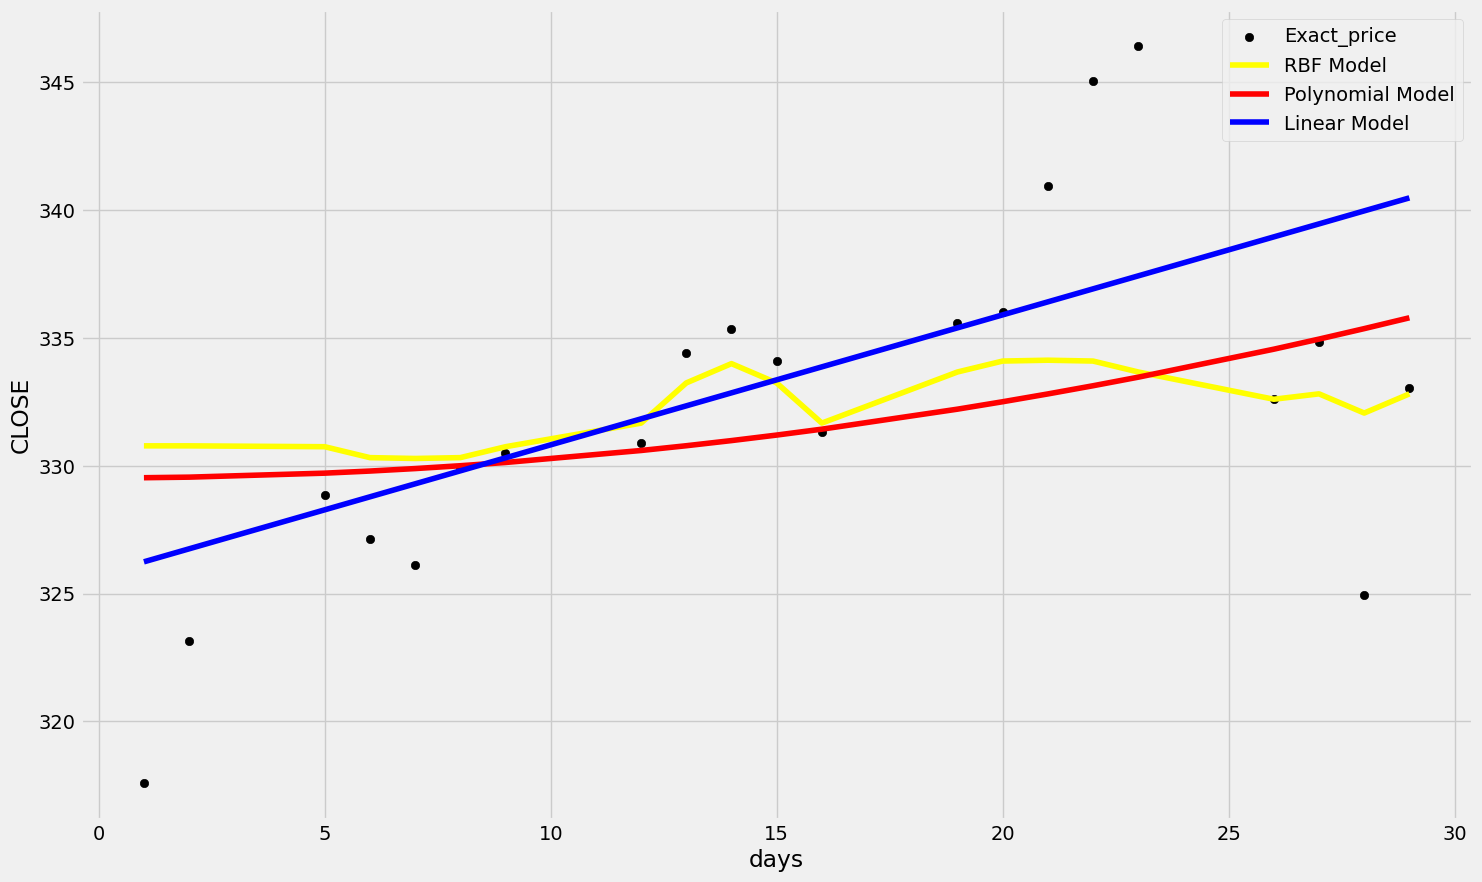

In [23]:
plt.figure(figsize=(16,10))
plt.scatter(days, CLOSE, color = 'black', label = 'Exact_price')
plt.plot(days, rbf_svr.predict(days), color = 'yellow', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'red', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('days')
plt.ylabel('CLOSE')
plt.legend()
plt.show()

In [24]:
day = [[21]]
print('The RBF SVR predicted price:', rbf_svr.predict(day))
print('The Polynomial SVR predicted price:', poly_svr.predict(day))
print('The Linear SVR predicted price:', lin_svr.predict(day))

The RBF SVR predicted price: [334.12658142]
The Polynomial SVR predicted price: [332.80745775]
The Linear SVR predicted price: [336.40833333]


In [25]:
print('The actual price:', actual_price['CLOSE'])

The actual price: 21    332.2
Name: CLOSE, dtype: float64
